# **Polynomial Regression**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

### Taking our own dataset (i.e. we are only creating the X and y)

In [4]:
X = 10 * np.linspace(-1, 1, 100)

In [5]:
y = np.sin(X) + np.random.randn(100) *0.15

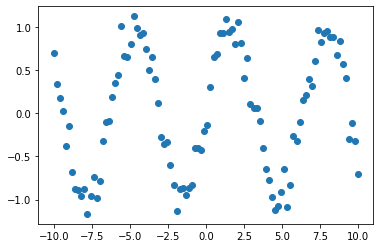

In [6]:
plt.scatter(X,y)

## Applying diffrent degree of polynomial and seeing how the curve the bending

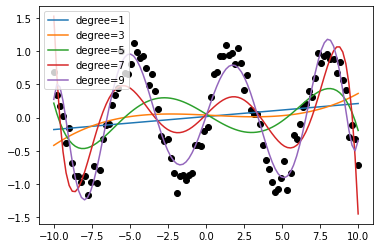

In [8]:
plt.scatter(X, y, color='black')
axis = plt.axis()
for degree in [1, 3, 5,7,9]:
    y_test = PolynomialRegression(degree).fit(X.reshape(-1, 1), y).predict(X.reshape(-1,1))
    plt.plot(X, y_test, label='degree={0}'.format(degree))
# plt.xlim(-10, 10)
# plt.ylim(-1, 1)
plt.legend(loc='best');

## using validation check to predict the best degree of polynomial

c:\users\manoj\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


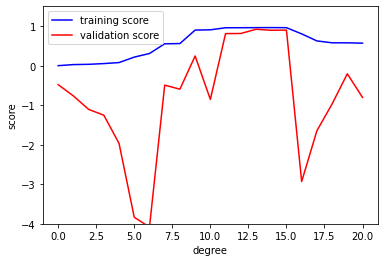

In [10]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X.reshape(-1, 1), y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(-4, 1.5)
plt.xlabel('degree')
plt.ylabel('score');

In the above graph we can see that at degree 13 the space between the validation score and training score is less so we can use that degree of polynomial

##### Here we are not splitting the data as train test and applying the model 
just we applying the model to the entire data and predicting the result for wntire datset and seeing the curve we got

In [11]:
model = PolynomialRegression(13)
model.fit(X.reshape(-1, 1), y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=13)),
                ('linearregression', LinearRegression())])

In [13]:
y_pred = model.predict(X.reshape(-1, 1))

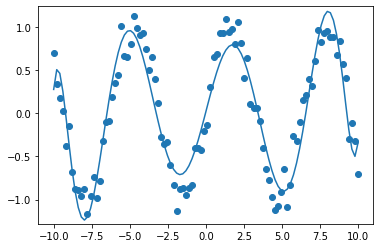

In [17]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
plt.plot(X, y_test);
plt.axis(lim);